In [1]:
#test if gpu is wokring
import tensorflow as tf
if tf.test.gpu_device_name(): 

    print(tf.test.gpu_device_name())

else:
    print("Please install GPU version of TF")

Please install GPU version of TF


In [2]:
path="D:\\User_Data\\Desktop\\kan-2\\NeuralNetwork\\"
import os
os.chdir(path)

In [3]:
#import necessary package
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

In [4]:
#model complie
model = Sequential()
model.add(Dense(105, input_dim=105, kernel_initializer='normal', activation='relu'))#input_dim=number of columns original :relu
model.add(Dense(24, activation='relu'))
#model.add(Dense(8,activation='relu'))
model.add(Dense(1, activation='relu'))#Here the source is using linear 
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 105)               11130     
_________________________________________________________________
dense_1 (Dense)              (None, 24)                2544      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 25        
Total params: 13,699
Trainable params: 13,699
Non-trainable params: 0
_________________________________________________________________


In [5]:
#df=pd.read_stata("CD_icd.dta")
df=pd.read_stata("CD_icd.dta",convert_missing=False)
df=df.dropna()
x_vars=["monday","tuesday","wednesday","thursday","friday","saturday","sunday","month1","month2","month3","month4","month5","month6"
  ,"month7","month8","month9","month10","month11","month12","male","age","icd_0diab2_365","icd_0liver_365","icd_0cardio_365","icd_0hbp_365"]
for i in df.columns:
    if "icd" in i and i not in x_vars:
        x_vars.append(i)
x=df[x_vars]
#from sklearn.preprocessing import PolynomialFeatures
#poly = PolynomialFeatures(degree=2,interaction_only=True,include_bias = False)
#x=poly.fit_transform(x)
y=df[["screening2"]]
#icd_auri1
scaler_x = MinMaxScaler()#able to change to other 
scaler_y = MinMaxScaler()#able to change
#print(scaler_x.fit(x))
#xscale=scaler_x.transform(x)
#print(scaler_y.fit(y))
#yscale=scaler_y.transform(y)
xscale=x
yscale=y
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)

In [6]:
iteration_step=5000

Epoch 1/5000
12943/12943 [==============================] - 12s 900us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2/5000
12943/12943 [==============================] - 12s 896us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3/5000
12943/12943 [==============================] - 12s 916us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4/5000
12943/12943 [==============================] - 13s 979us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 5/5000
12943/12943 [==============================] - 13s 979us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 6/5000
12943/12943 [==============================] - 13s 974us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.053

12943/12943 [==============================] - 12s 933us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 49/5000
12943/12943 [==============================] - 12s 908us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 50/5000
12943/12943 [==============================] - 11s 884us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 51/5000
12943/12943 [==============================] - 11s 887us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 52/5000
12943/12943 [==============================] - 12s 961us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 53/5000
12943/12943 [==============================] - 12s 932us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_

12943/12943 [==============================] - 11s 865us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 96/5000
12943/12943 [==============================] - 11s 868us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 97/5000
12943/12943 [==============================] - 11s 865us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 98/5000
12943/12943 [==============================] - 11s 870us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 99/5000
12943/12943 [==============================] - 11s 881us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 100/5000
12943/12943 [==============================] - 11s 862us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val

Epoch 142/5000
12943/12943 [==============================] - 11s 853us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 143/5000
12943/12943 [==============================] - 11s 849us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 144/5000
12943/12943 [==============================] - 11s 862us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 145/5000
12943/12943 [==============================] - 11s 876us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 146/5000
12943/12943 [==============================] - 11s 886us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 147/5000
12943/12943 [==============================] - 11s 858us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val

Epoch 189/5000
12943/12943 [==============================] - 11s 865us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 190/5000
12943/12943 [==============================] - 11s 868us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 191/5000
12943/12943 [==============================] - 11s 873us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 192/5000
12943/12943 [==============================] - 11s 885us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 193/5000
12943/12943 [==============================] - 12s 891us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 194/5000
12943/12943 [==============================] - 11s 864us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val

Epoch 236/5000
12943/12943 [==============================] - 11s 869us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 237/5000
12943/12943 [==============================] - 11s 867us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 238/5000
12943/12943 [==============================] - 11s 869us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 239/5000
12943/12943 [==============================] - 11s 847us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 240/5000
12943/12943 [==============================] - 11s 859us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 241/5000
12943/12943 [==============================] - 11s 861us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val

Epoch 283/5000
12943/12943 [==============================] - 11s 863us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 284/5000
12943/12943 [==============================] - 11s 852us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 285/5000
12943/12943 [==============================] - 11s 879us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 286/5000
12943/12943 [==============================] - 11s 856us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 287/5000
12943/12943 [==============================] - 11s 873us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 288/5000
12943/12943 [==============================] - 11s 888us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val

Epoch 330/5000
12943/12943 [==============================] - 11s 863us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 331/5000
12943/12943 [==============================] - 11s 857us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 332/5000
12943/12943 [==============================] - 11s 834us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 333/5000
12943/12943 [==============================] - 11s 864us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 334/5000
12943/12943 [==============================] - 11s 877us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 335/5000
12943/12943 [==============================] - 12s 943us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val

Epoch 377/5000
12943/12943 [==============================] - 11s 881us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 378/5000
12943/12943 [==============================] - 11s 870us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 379/5000
12943/12943 [==============================] - 11s 869us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 380/5000
12943/12943 [==============================] - 11s 860us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 381/5000
12943/12943 [==============================] - 11s 862us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 382/5000
12943/12943 [==============================] - 12s 892us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val

Epoch 424/5000
12943/12943 [==============================] - 11s 865us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 425/5000
12943/12943 [==============================] - 11s 856us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 426/5000
12943/12943 [==============================] - 12s 904us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 427/5000
12943/12943 [==============================] - 12s 907us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 428/5000
12943/12943 [==============================] - 12s 901us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 429/5000
12943/12943 [==============================] - 11s 865us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val

Epoch 471/5000
12943/12943 [==============================] - 11s 854us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 472/5000
12943/12943 [==============================] - 11s 847us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 473/5000
12943/12943 [==============================] - 11s 861us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 474/5000
12943/12943 [==============================] - 11s 866us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 475/5000
12943/12943 [==============================] - 11s 862us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 476/5000
12943/12943 [==============================] - 11s 855us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val

Epoch 518/5000
12943/12943 [==============================] - 11s 814us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 519/5000
12943/12943 [==============================] - 11s 847us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 520/5000
12943/12943 [==============================] - 11s 819us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 521/5000
12943/12943 [==============================] - 12s 894us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 522/5000
12943/12943 [==============================] - 11s 881us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 523/5000
12943/12943 [==============================] - 11s 866us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val

Epoch 565/5000
12943/12943 [==============================] - 12s 918us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 566/5000
12943/12943 [==============================] - 11s 860us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 567/5000
12943/12943 [==============================] - 12s 903us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 568/5000
12943/12943 [==============================] - 11s 863us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 569/5000
12943/12943 [==============================] - 12s 908us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 570/5000
12943/12943 [==============================] - 12s 895us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val

Epoch 612/5000
12943/12943 [==============================] - 12s 963us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 613/5000
12943/12943 [==============================] - 11s 885us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 614/5000
12943/12943 [==============================] - 11s 860us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 615/5000
12943/12943 [==============================] - 11s 874us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 616/5000
12943/12943 [==============================] - 11s 868us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 617/5000
12943/12943 [==============================] - 11s 872us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val

Epoch 659/5000
12943/12943 [==============================] - 12s 919us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 660/5000
12943/12943 [==============================] - 12s 896us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 661/5000
12943/12943 [==============================] - 13s 1ms/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 662/5000
12943/12943 [==============================] - 13s 975us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 663/5000
12943/12943 [==============================] - 13s 970us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 664/5000
12943/12943 [==============================] - 12s 960us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_l

Epoch 706/5000
12943/12943 [==============================] - 11s 854us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 707/5000
12943/12943 [==============================] - 12s 932us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 708/5000
12943/12943 [==============================] - 14s 1ms/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 709/5000
12943/12943 [==============================] - 15s 1ms/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 710/5000
12943/12943 [==============================] - 12s 902us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 711/5000
12943/12943 [==============================] - 12s 892us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_los

Epoch 753/5000
12943/12943 [==============================] - 11s 878us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 754/5000
12943/12943 [==============================] - 12s 930us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 755/5000
12943/12943 [==============================] - 12s 914us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 756/5000
12943/12943 [==============================] - 12s 944us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 757/5000
12943/12943 [==============================] - 12s 893us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 758/5000
12943/12943 [==============================] - 12s 917us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val

Epoch 800/5000
12943/12943 [==============================] - 11s 876us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 801/5000
12943/12943 [==============================] - 11s 878us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 802/5000
12943/12943 [==============================] - 11s 864us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 803/5000
12943/12943 [==============================] - 11s 879us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 804/5000
12943/12943 [==============================] - 11s 887us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 805/5000
12943/12943 [==============================] - 12s 954us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val

Epoch 847/5000
12943/12943 [==============================] - 14s 1ms/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 848/5000
12943/12943 [==============================] - 12s 904us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 849/5000
12943/12943 [==============================] - 12s 950us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 850/5000
12943/12943 [==============================] - 13s 973us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 851/5000
12943/12943 [==============================] - 13s 993us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 852/5000
12943/12943 [==============================] - 13s 1ms/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_los

Epoch 894/5000
12943/12943 [==============================] - 12s 940us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 895/5000
12943/12943 [==============================] - 12s 912us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 896/5000
12943/12943 [==============================] - 11s 888us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 897/5000
12943/12943 [==============================] - 12s 905us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 898/5000
12943/12943 [==============================] - 12s 899us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 899/5000
12943/12943 [==============================] - 12s 893us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val

Epoch 941/5000
12943/12943 [==============================] - 12s 951us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 942/5000
12943/12943 [==============================] - 14s 1ms/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 943/5000
12943/12943 [==============================] - 12s 922us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 944/5000
12943/12943 [==============================] - 12s 910us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 945/5000
12943/12943 [==============================] - 12s 921us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 946/5000
12943/12943 [==============================] - 12s 901us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_l

Epoch 988/5000
12943/12943 [==============================] - 11s 879us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 989/5000
12943/12943 [==============================] - 11s 874us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 990/5000
12943/12943 [==============================] - 11s 884us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 991/5000
12943/12943 [==============================] - 11s 860us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 992/5000
12943/12943 [==============================] - 11s 876us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 993/5000
12943/12943 [==============================] - 11s 882us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val

12943/12943 [==============================] - 12s 895us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1035/5000
12943/12943 [==============================] - 11s 877us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1036/5000
12943/12943 [==============================] - 12s 889us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1037/5000
12943/12943 [==============================] - 12s 890us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1038/5000
12943/12943 [==============================] - 12s 927us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1039/5000
12943/12943 [==============================] - 12s 949us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

Epoch 1081/5000
12943/12943 [==============================] - 11s 887us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1082/5000
12943/12943 [==============================] - 12s 929us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1083/5000
12943/12943 [==============================] - 13s 980us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1084/5000
12943/12943 [==============================] - 11s 850us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1085/5000
12943/12943 [==============================] - 11s 857us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1086/5000
12943/12943 [==============================] - 11s 851us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522

12943/12943 [==============================] - 12s 909us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1128/5000
12943/12943 [==============================] - 11s 855us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1129/5000
12943/12943 [==============================] - 12s 892us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1130/5000
12943/12943 [==============================] - 12s 917us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1131/5000
12943/12943 [==============================] - 11s 883us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1132/5000
12943/12943 [==============================] - 12s 916us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

Epoch 1174/5000
12943/12943 [==============================] - 12s 937us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1175/5000
12943/12943 [==============================] - 12s 916us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1176/5000
12943/12943 [==============================] - 12s 897us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1177/5000
12943/12943 [==============================] - 12s 909us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1178/5000
12943/12943 [==============================] - 12s 956us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1179/5000
12943/12943 [==============================] - 12s 937us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522

12943/12943 [==============================] - 11s 854us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1221/5000
12943/12943 [==============================] - 11s 845us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1222/5000
12943/12943 [==============================] - 11s 840us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1223/5000
12943/12943 [==============================] - 11s 873us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1224/5000
12943/12943 [==============================] - 12s 889us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1225/5000
12943/12943 [==============================] - 11s 853us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 863us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1267/5000
12943/12943 [==============================] - 11s 843us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1268/5000
12943/12943 [==============================] - 11s 845us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1269/5000
12943/12943 [==============================] - 11s 838us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1270/5000
12943/12943 [==============================] - 11s 860us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1271/5000
12943/12943 [==============================] - 11s 839us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

Epoch 1313/5000
12943/12943 [==============================] - 11s 846us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1314/5000
12943/12943 [==============================] - 11s 840us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1315/5000
12943/12943 [==============================] - 11s 834us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1316/5000
12943/12943 [==============================] - 11s 856us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1317/5000
12943/12943 [==============================] - 12s 890us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1318/5000
12943/12943 [==============================] - 12s 955us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522

12943/12943 [==============================] - 11s 845us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1360/5000
12943/12943 [==============================] - 11s 844us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1361/5000
12943/12943 [==============================] - 11s 851us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1362/5000
12943/12943 [==============================] - 11s 847us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1363/5000
12943/12943 [==============================] - 11s 843us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1364/5000
12943/12943 [==============================] - 11s 852us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 846us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1406/5000
12943/12943 [==============================] - 11s 836us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1407/5000
12943/12943 [==============================] - 11s 833us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1408/5000
12943/12943 [==============================] - 11s 846us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1409/5000
12943/12943 [==============================] - 11s 855us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1410/5000
12943/12943 [==============================] - 11s 836us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 853us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1452/5000
12943/12943 [==============================] - 11s 866us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1453/5000
12943/12943 [==============================] - 12s 908us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1454/5000
12943/12943 [==============================] - 12s 895us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1455/5000
12943/12943 [==============================] - 11s 836us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1456/5000
12943/12943 [==============================] - 11s 845us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 847us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1498/5000
12943/12943 [==============================] - 11s 846us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1499/5000
12943/12943 [==============================] - 11s 843us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1500/5000
12943/12943 [==============================] - 11s 839us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1501/5000
12943/12943 [==============================] - 11s 848us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1502/5000
12943/12943 [==============================] - 11s 843us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 837us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1544/5000
12943/12943 [==============================] - 11s 836us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1545/5000
12943/12943 [==============================] - 11s 849us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1546/5000
12943/12943 [==============================] - 11s 824us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1547/5000
12943/12943 [==============================] - 11s 838us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1548/5000
12943/12943 [==============================] - 11s 851us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 845us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1590/5000
12943/12943 [==============================] - 11s 838us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1591/5000
12943/12943 [==============================] - 11s 834us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1592/5000
12943/12943 [==============================] - 11s 852us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1593/5000
12943/12943 [==============================] - 11s 845us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1594/5000
12943/12943 [==============================] - 11s 888us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 849us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1636/5000
12943/12943 [==============================] - 11s 845us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1637/5000
12943/12943 [==============================] - 11s 854us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1638/5000
12943/12943 [==============================] - 11s 842us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1639/5000
12943/12943 [==============================] - 11s 844us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1640/5000
12943/12943 [==============================] - 11s 847us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

Epoch 1682/5000
12943/12943 [==============================] - 11s 853us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1683/5000
12943/12943 [==============================] - 11s 846us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1684/5000
12943/12943 [==============================] - 11s 842us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1685/5000
12943/12943 [==============================] - 11s 840us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1686/5000
12943/12943 [==============================] - 11s 845us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1687/5000
12943/12943 [==============================] - 11s 838us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522

12943/12943 [==============================] - 11s 854us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1729/5000
12943/12943 [==============================] - 11s 846us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1730/5000
12943/12943 [==============================] - 11s 839us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1731/5000
12943/12943 [==============================] - 11s 868us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1732/5000
12943/12943 [==============================] - 11s 849us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1733/5000
12943/12943 [==============================] - 11s 836us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 835us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1775/5000
12943/12943 [==============================] - 11s 846us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1776/5000
12943/12943 [==============================] - 11s 844us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1777/5000
12943/12943 [==============================] - 11s 858us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1778/5000
12943/12943 [==============================] - 11s 825us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1779/5000
12943/12943 [==============================] - 11s 866us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 855us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1821/5000
12943/12943 [==============================] - 11s 826us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1822/5000
12943/12943 [==============================] - 11s 835us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1823/5000
12943/12943 [==============================] - 11s 847us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1824/5000
12943/12943 [==============================] - 11s 851us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1825/5000
12943/12943 [==============================] - 11s 848us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 860us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1867/5000
12943/12943 [==============================] - 11s 837us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1868/5000
12943/12943 [==============================] - 11s 846us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1869/5000
12943/12943 [==============================] - 11s 845us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1870/5000
12943/12943 [==============================] - 11s 848us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1871/5000
12943/12943 [==============================] - 11s 843us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 854us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1913/5000
12943/12943 [==============================] - 11s 836us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1914/5000
12943/12943 [==============================] - 11s 841us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1915/5000
12943/12943 [==============================] - 11s 833us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1916/5000
12943/12943 [==============================] - 11s 846us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1917/5000
12943/12943 [==============================] - 11s 846us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

Epoch 1959/5000
12943/12943 [==============================] - 11s 873us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1960/5000
12943/12943 [==============================] - 12s 919us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1961/5000
12943/12943 [==============================] - 12s 923us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1962/5000
12943/12943 [==============================] - 12s 919us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1963/5000
12943/12943 [==============================] - 12s 918us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 1964/5000
12943/12943 [==============================] - 12s 912us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522

12943/12943 [==============================] - 11s 840us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2006/5000
12943/12943 [==============================] - 11s 862us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2007/5000
12943/12943 [==============================] - 11s 845us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2008/5000
12943/12943 [==============================] - 11s 852us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2009/5000
12943/12943 [==============================] - 11s 852us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2010/5000
12943/12943 [==============================] - 11s 843us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 13s 1ms/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2052/5000
12943/12943 [==============================] - 13s 1ms/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2053/5000
12943/12943 [==============================] - 13s 992us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2054/5000
12943/12943 [==============================] - 11s 837us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2055/5000
12943/12943 [==============================] - 11s 829us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2056/5000
12943/12943 [==============================] - 11s 845us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 

Epoch 2098/5000
12943/12943 [==============================] - 11s 844us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2099/5000
12943/12943 [==============================] - 11s 837us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2100/5000
12943/12943 [==============================] - 11s 850us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2101/5000
12943/12943 [==============================] - 11s 852us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2102/5000
12943/12943 [==============================] - 11s 825us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2103/5000
12943/12943 [==============================] - 11s 837us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522

12943/12943 [==============================] - 11s 852us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2145/5000
12943/12943 [==============================] - 11s 838us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2146/5000
12943/12943 [==============================] - 11s 847us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2147/5000
12943/12943 [==============================] - 11s 852us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2148/5000
12943/12943 [==============================] - 11s 851us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2149/5000
12943/12943 [==============================] - 11s 846us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 854us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2191/5000
12943/12943 [==============================] - 11s 887us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2192/5000
12943/12943 [==============================] - 12s 909us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2193/5000
12943/12943 [==============================] - 12s 927us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2194/5000
12943/12943 [==============================] - 12s 925us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2195/5000
12943/12943 [==============================] - 11s 840us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 852us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2237/5000
12943/12943 [==============================] - 11s 856us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2238/5000
12943/12943 [==============================] - 11s 850us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2239/5000
12943/12943 [==============================] - 11s 833us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2240/5000
12943/12943 [==============================] - 11s 846us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2241/5000
12943/12943 [==============================] - 11s 869us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 837us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2283/5000
12943/12943 [==============================] - 11s 841us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2284/5000
12943/12943 [==============================] - 11s 859us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2285/5000
12943/12943 [==============================] - 11s 846us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2286/5000
12943/12943 [==============================] - 11s 841us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2287/5000
12943/12943 [==============================] - 11s 836us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 850us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2329/5000
12943/12943 [==============================] - 11s 846us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2330/5000
12943/12943 [==============================] - 11s 837us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2331/5000
12943/12943 [==============================] - 11s 836us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2332/5000
12943/12943 [==============================] - 11s 871us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2333/5000
12943/12943 [==============================] - 13s 986us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

Epoch 2375/5000
12943/12943 [==============================] - 11s 846us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2376/5000
12943/12943 [==============================] - 11s 842us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2377/5000
12943/12943 [==============================] - 11s 843us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2378/5000
12943/12943 [==============================] - 11s 838us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2379/5000
12943/12943 [==============================] - 11s 830us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2380/5000
12943/12943 [==============================] - 11s 839us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522

12943/12943 [==============================] - 11s 833us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2422/5000
12943/12943 [==============================] - 11s 844us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2423/5000
12943/12943 [==============================] - 11s 852us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2424/5000
12943/12943 [==============================] - 11s 849us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2425/5000
12943/12943 [==============================] - 12s 904us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2426/5000
12943/12943 [==============================] - 12s 915us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 835us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2468/5000
12943/12943 [==============================] - 11s 834us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2469/5000
12943/12943 [==============================] - 11s 850us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2470/5000
12943/12943 [==============================] - 11s 842us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2471/5000
12943/12943 [==============================] - 11s 843us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2472/5000
12943/12943 [==============================] - 11s 854us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 12s 892us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2514/5000
12943/12943 [==============================] - 11s 839us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2515/5000
12943/12943 [==============================] - 11s 833us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2516/5000
12943/12943 [==============================] - 11s 840us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2517/5000
12943/12943 [==============================] - 11s 883us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2518/5000
12943/12943 [==============================] - 12s 959us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 849us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2560/5000
12943/12943 [==============================] - 11s 834us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2561/5000
12943/12943 [==============================] - 11s 852us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2562/5000
12943/12943 [==============================] - 11s 827us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2563/5000
12943/12943 [==============================] - 11s 834us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2564/5000
12943/12943 [==============================] - 11s 839us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 876us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2606/5000
12943/12943 [==============================] - 11s 843us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2607/5000
12943/12943 [==============================] - 11s 851us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2608/5000
12943/12943 [==============================] - 11s 846us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2609/5000
12943/12943 [==============================] - 12s 914us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2610/5000
12943/12943 [==============================] - 13s 966us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 835us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2652/5000
12943/12943 [==============================] - 11s 861us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2653/5000
12943/12943 [==============================] - 11s 861us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2654/5000
12943/12943 [==============================] - 11s 848us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2655/5000
12943/12943 [==============================] - 11s 848us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2656/5000
12943/12943 [==============================] - 11s 828us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 856us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2698/5000
12943/12943 [==============================] - 11s 840us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2699/5000
12943/12943 [==============================] - 11s 844us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2700/5000
12943/12943 [==============================] - 11s 849us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2701/5000
12943/12943 [==============================] - 11s 847us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2702/5000
12943/12943 [==============================] - 11s 840us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 845us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2744/5000
12943/12943 [==============================] - 11s 847us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2745/5000
12943/12943 [==============================] - 11s 833us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2746/5000
12943/12943 [==============================] - 11s 845us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2747/5000
12943/12943 [==============================] - 11s 841us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2748/5000
12943/12943 [==============================] - 11s 855us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

Epoch 2790/5000
12943/12943 [==============================] - 11s 846us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2791/5000
12943/12943 [==============================] - 11s 833us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2792/5000
12943/12943 [==============================] - 11s 850us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2793/5000
12943/12943 [==============================] - 11s 849us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2794/5000
12943/12943 [==============================] - 11s 853us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2795/5000
12943/12943 [==============================] - 11s 830us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522

12943/12943 [==============================] - 11s 848us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2837/5000
12943/12943 [==============================] - 11s 876us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2838/5000
12943/12943 [==============================] - 11s 830us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2839/5000
12943/12943 [==============================] - 11s 856us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2840/5000
12943/12943 [==============================] - 11s 855us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2841/5000
12943/12943 [==============================] - 11s 851us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 847us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2883/5000
12943/12943 [==============================] - 11s 858us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2884/5000
12943/12943 [==============================] - 11s 844us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2885/5000
12943/12943 [==============================] - 11s 864us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2886/5000
12943/12943 [==============================] - 11s 845us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2887/5000
12943/12943 [==============================] - 11s 844us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 844us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2929/5000
12943/12943 [==============================] - 11s 848us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2930/5000
12943/12943 [==============================] - 11s 839us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2931/5000
12943/12943 [==============================] - 11s 837us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2932/5000
12943/12943 [==============================] - 11s 845us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2933/5000
12943/12943 [==============================] - 11s 835us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 850us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2975/5000
12943/12943 [==============================] - 11s 840us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2976/5000
12943/12943 [==============================] - 11s 847us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2977/5000
12943/12943 [==============================] - 11s 856us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2978/5000
12943/12943 [==============================] - 11s 851us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 2979/5000
12943/12943 [==============================] - 11s 852us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 852us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3021/5000
12943/12943 [==============================] - 11s 858us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3022/5000
12943/12943 [==============================] - 11s 843us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3023/5000
12943/12943 [==============================] - 11s 843us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3024/5000
12943/12943 [==============================] - 11s 833us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3025/5000
12943/12943 [==============================] - 11s 833us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 849us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3067/5000
12943/12943 [==============================] - 11s 834us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3068/5000
12943/12943 [==============================] - 11s 837us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3069/5000
12943/12943 [==============================] - 11s 839us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3070/5000
12943/12943 [==============================] - 11s 844us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3071/5000
12943/12943 [==============================] - 11s 832us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 860us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3113/5000
12943/12943 [==============================] - 11s 840us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3114/5000
12943/12943 [==============================] - 11s 839us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3115/5000
12943/12943 [==============================] - 11s 848us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3116/5000
12943/12943 [==============================] - 11s 841us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3117/5000
12943/12943 [==============================] - 11s 845us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

Epoch 3159/5000
12943/12943 [==============================] - 11s 834us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3160/5000
12943/12943 [==============================] - 11s 860us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3161/5000
12943/12943 [==============================] - 11s 852us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3162/5000
12943/12943 [==============================] - 11s 852us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3163/5000
12943/12943 [==============================] - 11s 883us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3164/5000
12943/12943 [==============================] - 11s 841us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522

12943/12943 [==============================] - 12s 911us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3206/5000
12943/12943 [==============================] - 13s 983us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3207/5000
12943/12943 [==============================] - 13s 987us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3208/5000
12943/12943 [==============================] - 11s 856us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3209/5000
12943/12943 [==============================] - 11s 838us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3210/5000
12943/12943 [==============================] - 11s 850us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 835us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3252/5000
12943/12943 [==============================] - 11s 839us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3253/5000
12943/12943 [==============================] - 11s 845us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3254/5000
12943/12943 [==============================] - 11s 839us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3255/5000
12943/12943 [==============================] - 11s 848us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3256/5000
12943/12943 [==============================] - 11s 836us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 839us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3298/5000
12943/12943 [==============================] - 11s 843us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3299/5000
12943/12943 [==============================] - 11s 841us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3300/5000
12943/12943 [==============================] - 11s 837us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3301/5000
12943/12943 [==============================] - 11s 850us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3302/5000
12943/12943 [==============================] - 11s 858us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

Epoch 3344/5000
12943/12943 [==============================] - 11s 841us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3345/5000
12943/12943 [==============================] - 11s 857us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3346/5000
12943/12943 [==============================] - 11s 856us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3347/5000
12943/12943 [==============================] - 11s 848us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3348/5000
12943/12943 [==============================] - 11s 836us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3349/5000
12943/12943 [==============================] - 11s 840us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522

12943/12943 [==============================] - 11s 841us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3391/5000
12943/12943 [==============================] - 11s 846us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3392/5000
12943/12943 [==============================] - 11s 853us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3393/5000
12943/12943 [==============================] - 11s 843us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3394/5000
12943/12943 [==============================] - 11s 844us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3395/5000
12943/12943 [==============================] - 11s 854us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 841us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3437/5000
12943/12943 [==============================] - 11s 852us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3438/5000
12943/12943 [==============================] - 11s 843us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3439/5000
12943/12943 [==============================] - 11s 834us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3440/5000
12943/12943 [==============================] - 11s 837us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3441/5000
12943/12943 [==============================] - 11s 837us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 12s 961us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3483/5000
12943/12943 [==============================] - 12s 962us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3484/5000
12943/12943 [==============================] - 11s 846us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3485/5000
12943/12943 [==============================] - 11s 843us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3486/5000
12943/12943 [==============================] - 11s 836us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3487/5000
12943/12943 [==============================] - 11s 854us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 837us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3529/5000
12943/12943 [==============================] - 11s 865us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3530/5000
12943/12943 [==============================] - 12s 938us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3531/5000
12943/12943 [==============================] - 12s 945us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3532/5000
12943/12943 [==============================] - 13s 1ms/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3533/5000
12943/12943 [==============================] - 12s 943us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.053

Epoch 3575/5000
12943/12943 [==============================] - 11s 848us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3576/5000
12943/12943 [==============================] - 11s 845us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3577/5000
12943/12943 [==============================] - 11s 841us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3578/5000
12943/12943 [==============================] - 11s 848us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3579/5000
12943/12943 [==============================] - 11s 837us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3580/5000
12943/12943 [==============================] - 11s 836us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522

12943/12943 [==============================] - 11s 831us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3622/5000
12943/12943 [==============================] - 11s 845us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3623/5000
12943/12943 [==============================] - 11s 846us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3624/5000
12943/12943 [==============================] - 11s 867us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3625/5000
12943/12943 [==============================] - 11s 888us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3626/5000
12943/12943 [==============================] - 11s 849us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 834us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3668/5000
12943/12943 [==============================] - 11s 835us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3669/5000
12943/12943 [==============================] - 11s 832us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3670/5000
12943/12943 [==============================] - 11s 856us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3671/5000
12943/12943 [==============================] - 11s 848us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3672/5000
12943/12943 [==============================] - 11s 848us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 839us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3714/5000
12943/12943 [==============================] - 11s 836us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3715/5000
12943/12943 [==============================] - 11s 840us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3716/5000
12943/12943 [==============================] - 11s 845us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3717/5000
12943/12943 [==============================] - 11s 841us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3718/5000
12943/12943 [==============================] - 11s 832us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 835us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3760/5000
12943/12943 [==============================] - 11s 842us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3761/5000
12943/12943 [==============================] - 11s 847us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3762/5000
12943/12943 [==============================] - 11s 846us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3763/5000
12943/12943 [==============================] - 11s 846us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3764/5000
12943/12943 [==============================] - 11s 847us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 886us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3806/5000
12943/12943 [==============================] - 12s 950us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3807/5000
12943/12943 [==============================] - 12s 911us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3808/5000
12943/12943 [==============================] - 12s 909us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3809/5000
12943/12943 [==============================] - 11s 879us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3810/5000
12943/12943 [==============================] - 11s 840us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 836us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3852/5000
12943/12943 [==============================] - 11s 839us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3853/5000
12943/12943 [==============================] - 11s 834us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3854/5000
12943/12943 [==============================] - 11s 846us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3855/5000
12943/12943 [==============================] - 11s 868us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3856/5000
12943/12943 [==============================] - 11s 852us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 838us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3898/5000
12943/12943 [==============================] - 11s 878us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3899/5000
12943/12943 [==============================] - 11s 854us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3900/5000
12943/12943 [==============================] - 11s 833us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3901/5000
12943/12943 [==============================] - 11s 849us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3902/5000
12943/12943 [==============================] - 11s 843us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 883us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3944/5000
12943/12943 [==============================] - 11s 884us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3945/5000
12943/12943 [==============================] - 12s 928us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3946/5000
12943/12943 [==============================] - 12s 941us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3947/5000
12943/12943 [==============================] - 12s 908us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3948/5000
12943/12943 [==============================] - 12s 910us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 866us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3990/5000
12943/12943 [==============================] - 11s 884us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3991/5000
12943/12943 [==============================] - 12s 907us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3992/5000
12943/12943 [==============================] - 12s 905us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3993/5000
12943/12943 [==============================] - 12s 915us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 3994/5000
12943/12943 [==============================] - 12s 912us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 867us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4036/5000
12943/12943 [==============================] - 11s 863us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4037/5000
12943/12943 [==============================] - 11s 861us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4038/5000
12943/12943 [==============================] - 11s 863us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4039/5000
12943/12943 [==============================] - 11s 850us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4040/5000
12943/12943 [==============================] - 11s 848us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 854us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4082/5000
12943/12943 [==============================] - 11s 842us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4083/5000
12943/12943 [==============================] - 11s 881us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4084/5000
12943/12943 [==============================] - 12s 945us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4085/5000
12943/12943 [==============================] - 12s 954us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4086/5000
12943/12943 [==============================] - 12s 942us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

Epoch 4128/5000
12943/12943 [==============================] - 12s 931us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4129/5000
12943/12943 [==============================] - 11s 848us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4130/5000
12943/12943 [==============================] - 11s 845us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4131/5000
12943/12943 [==============================] - 11s 851us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4132/5000
12943/12943 [==============================] - 11s 842us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4133/5000
12943/12943 [==============================] - 11s 844us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522

12943/12943 [==============================] - 11s 839us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4175/5000
12943/12943 [==============================] - 11s 857us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4176/5000
12943/12943 [==============================] - 11s 848us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4177/5000
12943/12943 [==============================] - 11s 868us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4178/5000
12943/12943 [==============================] - 11s 856us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4179/5000
12943/12943 [==============================] - 11s 851us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 848us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4221/5000
12943/12943 [==============================] - 11s 844us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4222/5000
12943/12943 [==============================] - 11s 837us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4223/5000
12943/12943 [==============================] - 11s 833us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4224/5000
12943/12943 [==============================] - 11s 833us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4225/5000
12943/12943 [==============================] - 11s 835us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 836us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4267/5000
12943/12943 [==============================] - 11s 838us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4268/5000
12943/12943 [==============================] - 11s 835us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4269/5000
12943/12943 [==============================] - 11s 852us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4270/5000
12943/12943 [==============================] - 11s 848us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4271/5000
12943/12943 [==============================] - 11s 848us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 847us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4313/5000
12943/12943 [==============================] - 11s 845us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4314/5000
12943/12943 [==============================] - 11s 843us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4315/5000
12943/12943 [==============================] - 11s 844us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4316/5000
12943/12943 [==============================] - 11s 833us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4317/5000
12943/12943 [==============================] - 11s 850us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 832us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4359/5000
12943/12943 [==============================] - 11s 835us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4360/5000
12943/12943 [==============================] - 11s 849us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4361/5000
12943/12943 [==============================] - 11s 851us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4362/5000
12943/12943 [==============================] - 11s 857us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4363/5000
12943/12943 [==============================] - 11s 858us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 839us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4405/5000
12943/12943 [==============================] - 11s 855us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4406/5000
12943/12943 [==============================] - 11s 858us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4407/5000
12943/12943 [==============================] - 11s 836us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4408/5000
12943/12943 [==============================] - 11s 844us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4409/5000
12943/12943 [==============================] - 11s 847us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 10s 783us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4451/5000
12943/12943 [==============================] - 10s 773us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4452/5000
12943/12943 [==============================] - 11s 860us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4453/5000
12943/12943 [==============================] - 12s 919us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4454/5000
12943/12943 [==============================] - 12s 923us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4455/5000
12943/12943 [==============================] - 12s 958us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 10s 778us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4497/5000
12943/12943 [==============================] - 10s 782us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4498/5000
12943/12943 [==============================] - 10s 788us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4499/5000
12943/12943 [==============================] - 10s 781us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4500/5000
12943/12943 [==============================] - 10s 782us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4501/5000
12943/12943 [==============================] - 10s 783us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 10s 797us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4543/5000
12943/12943 [==============================] - 10s 782us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4544/5000
12943/12943 [==============================] - 10s 783us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4545/5000
12943/12943 [==============================] - 10s 785us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4546/5000
12943/12943 [==============================] - 10s 787us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4547/5000
12943/12943 [==============================] - 10s 787us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 10s 785us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4589/5000
12943/12943 [==============================] - 11s 828us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4590/5000
12943/12943 [==============================] - 11s 837us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4591/5000
12943/12943 [==============================] - 11s 842us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4592/5000
12943/12943 [==============================] - 11s 827us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4593/5000
12943/12943 [==============================] - 11s 835us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 10s 782us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4635/5000
12943/12943 [==============================] - 10s 791us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4636/5000
12943/12943 [==============================] - 10s 782us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4637/5000
12943/12943 [==============================] - 10s 781us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4638/5000
12943/12943 [==============================] - 10s 784us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4639/5000
12943/12943 [==============================] - 10s 780us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 10s 780us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4681/5000
12943/12943 [==============================] - 10s 786us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4682/5000
12943/12943 [==============================] - 10s 799us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4683/5000
12943/12943 [==============================] - 10s 781us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4684/5000
12943/12943 [==============================] - 10s 781us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4685/5000
12943/12943 [==============================] - 10s 779us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 10s 786us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4727/5000
12943/12943 [==============================] - 10s 791us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4728/5000
12943/12943 [==============================] - 10s 794us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4729/5000
12943/12943 [==============================] - 10s 796us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4730/5000
12943/12943 [==============================] - 11s 818us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4731/5000
12943/12943 [==============================] - 10s 781us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 10s 780us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4773/5000
12943/12943 [==============================] - 10s 789us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4774/5000
12943/12943 [==============================] - 10s 781us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4775/5000
12943/12943 [==============================] - 10s 794us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4776/5000
12943/12943 [==============================] - 10s 795us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4777/5000
12943/12943 [==============================] - 10s 782us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 11s 819us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4819/5000
12943/12943 [==============================] - 10s 783us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4820/5000
12943/12943 [==============================] - 10s 784us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4821/5000
12943/12943 [==============================] - 10s 794us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4822/5000
12943/12943 [==============================] - 10s 798us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4823/5000
12943/12943 [==============================] - 10s 779us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 10s 775us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4865/5000
12943/12943 [==============================] - 10s 778us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4866/5000
12943/12943 [==============================] - 10s 779us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4867/5000
12943/12943 [==============================] - 10s 776us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4868/5000
12943/12943 [==============================] - 10s 787us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4869/5000
12943/12943 [==============================] - 10s 801us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 10s 796us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4911/5000
12943/12943 [==============================] - 10s 779us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4912/5000
12943/12943 [==============================] - 10s 784us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4913/5000
12943/12943 [==============================] - 10s 783us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4914/5000
12943/12943 [==============================] - 10s 782us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4915/5000
12943/12943 [==============================] - 10s 784us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

12943/12943 [==============================] - 10s 787us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4957/5000
12943/12943 [==============================] - 10s 784us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4958/5000
12943/12943 [==============================] - 10s 782us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4959/5000
12943/12943 [==============================] - 10s 779us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4960/5000
12943/12943 [==============================] - 10s 782us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0532 - val_mse: 0.0532 - val_mae: 0.0532
Epoch 4961/5000
12943/12943 [==============================] - 10s 788us/step - loss: 0.0522 - mse: 0.0522 - mae: 0.0522 - val_loss: 0.0

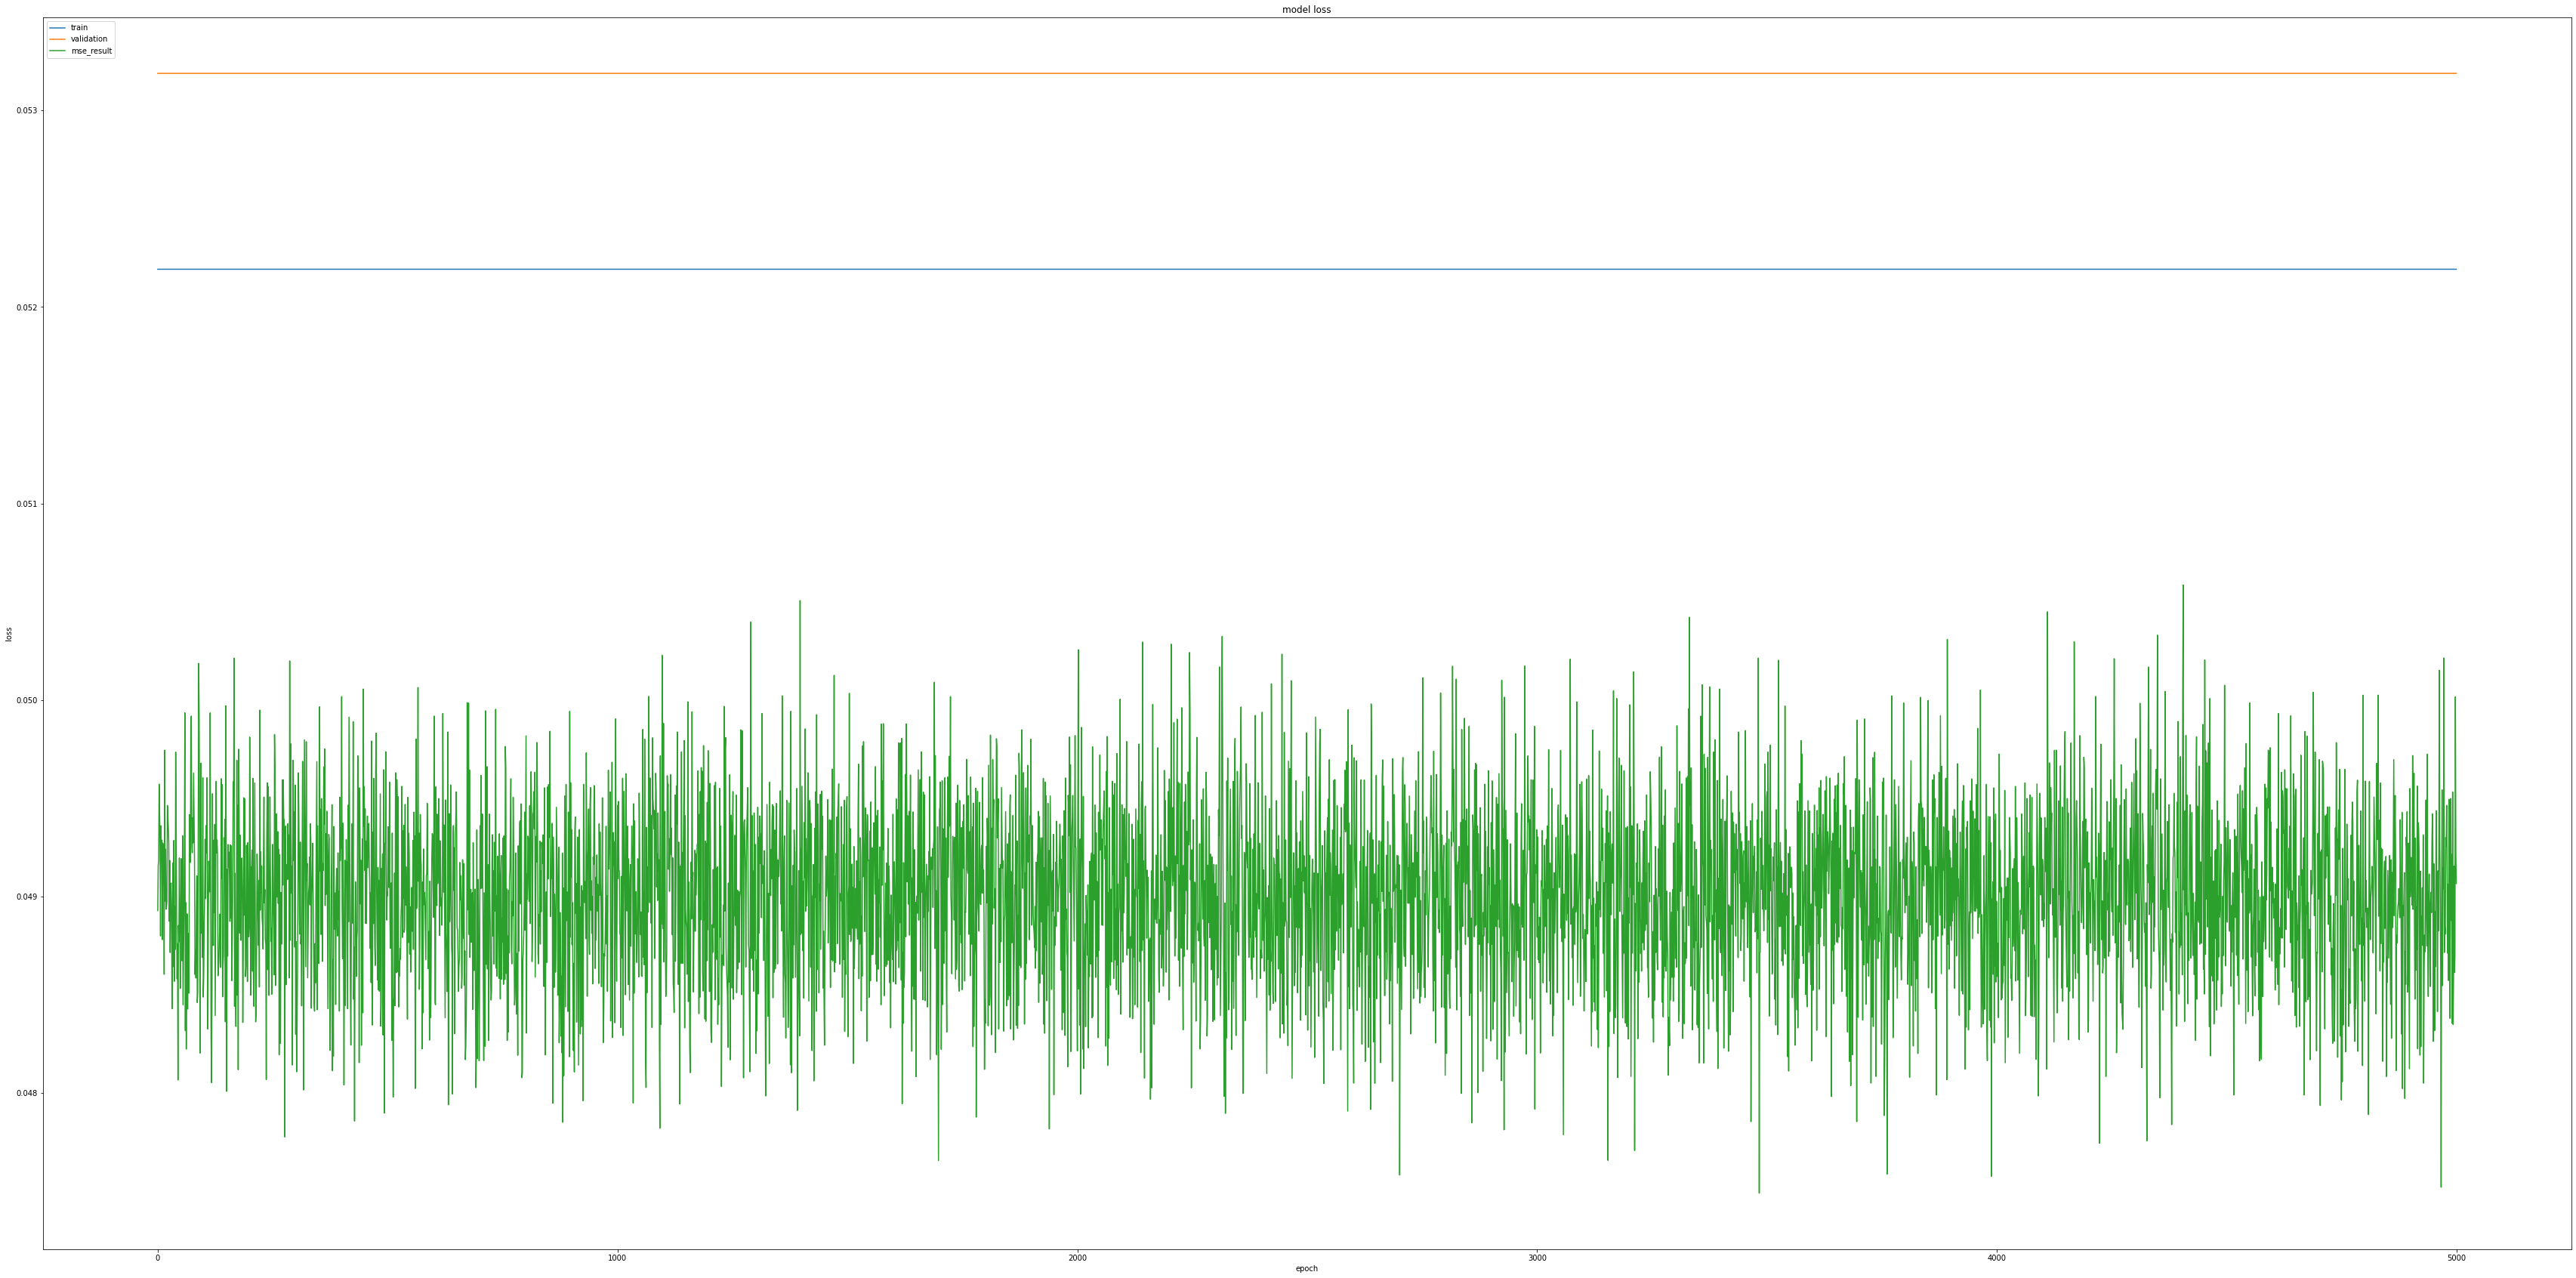

In [7]:
#Execution
history = model.fit(x,y, epochs=iteration_step, batch_size=50,  verbose=1, validation_split=0.2)#epochs=max steps batch_size=numer of sample will be trained at once
counter=0
mse_result=[]
while counter<iteration_step:
    X_train, X_test, y_train, y_test = train_test_split(xscale, yscale,test_size=0.2)
    #Standard OLS performance
    from sklearn import linear_model
    reg = linear_model.LinearRegression()
    reg.fit (X_train,y_train)
    from sklearn.metrics import mean_squared_error
    y_pred=reg.predict(X_test)

    mse = mean_squared_error(y_test,y_pred)
    mse_result.append(mse)
    counter=counter+1
    #mse = ((y_test-y_pred)**2).mean(axis=ax)
k=0
for i in mse_result:
    k=k+i
print(k/len(mse_result))
print(history.history.keys())
# "Loss"
plt.figure(figsize=(60,30))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(mse_result)
plt.plot()
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation','mse_result'], loc='upper left')
plt.savefig("D:\\User_Data\\Documents\\GitHub\\Neural_Network\\"+str(iteration_step)+"epoch_screening2.png")

In [ ]:
print(history.history.keys())
# "Loss"
plt.figure(figsize=(60,30))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(mse_result)
plt.plot()
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation','mse_result'], loc='upper left')
plt.savefig("D:\\User_Data\\Documents\\GitHub\\Neural_Network\\"+str(iteration_step)+"epoch.png")

In [ ]:
k=0
for i in mse_result:
    k=k+i
print(k/len(mse_result))

In [ ]:
counter=0
mse_result=[]
while counter<=250:
    X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)
    #Standard OLS performance
    from sklearn import linear_model
    reg = linear_model.LinearRegression()
    reg.fit (X_train,y_train)
    from sklearn.metrics import mean_squared_error
    y_pred=reg.predict(X_test)

    mse = mean_squared_error(y_test,y_pred)
    mse_result.append(mse)
    counter=counter+1
    #mse = ((y_test-y_pred)**2).mean(axis=ax)


In [ ]:
mse_result

In [ ]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=5, max_iter=100).fit(X_train, y_train)
y_pred=regr.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
mse


In [8]:
drug_df=pd.DataFrame()
drug_df["loss"]=history.history["loss"]
drug_df["val_loss"]=history.history["val_loss"]
drug_df["lrmse"]=mse_result

In [ ]:
len(mse_result)

In [9]:
drug_df.to_csv("screening2_result.csv")